<a href="https://colab.research.google.com/github/tanmay-srivastav4/shor_algorithm/blob/main/shors_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Setup



In [ ]:
!pip install panda qiskit qiskit-ibm-runtime

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 74.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 74.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 368.7/368.7 kB 34.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 89.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 11.1 MB/s eta 0:00:00
  Created wheel for panda: filename=panda-0.3.1-py3-none-any.whl size=7239 sha256=e31ca56fcf159db5d4dfd869ed7ae22fc24089eee8af21a02d5e941ea15da00d
  Stored in directory: /root/.cache/pip/wheels/98/41/5b/6ca54e0b6a35e1b7248c12f56fcb753dfb7717fefaa0fb45f5
Successfully built panda


In [ ]:
import numpy as np
import pandas as pd
from fractions import Fraction
from math import floor, gcd, log

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import QFT, UnitaryGate
from qiskit.transpiler import CouplingMap, generate_preset_pass_manager
from qiskit.visualization import plot_histogram

from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2 as Sampler

#Optimize problem for quantum hardware execution



In [ ]:
import numpy as np
from math import floor, log, gcd

# Get N from user input (assuming the previous cell already takes N)
N = int(input("Enter the value for N: "))

# Get a from user input
while True:
    a = int(input(f"Enter a value for 'a' (1 < a < {N} and gcd(a, {N}) == 1): "))
    if 1 < a < N and gcd(a, N) == 1:
        break
    else:
        print(f"Invalid value for 'a'. Please enter an integer between 1 and {N} that is coprime to {N}.")

# Determine the number of control qubits based on N
num_target = floor(log(N - 1, 2)) + 1
num_control = 2 * num_target # For enough precision of estimation

# Compute the b values
def a2kmodN(a, k, N):
    """Compute a^{2^k} (mod N) by repeated squaring"""
    for _ in range(k):
        a = int(np.mod(a**2, N))
    return a

k_list = range(num_control)
b_list = [a2kmodN(a, k, N) for k in k_list]

print(f"\nFor N={N} and a={a}, the b values for k=0 to {num_control-1} are:")
print(b_list)

Enter the value for N: 15
Enter a value for 'a' (1 < a < 15 and gcd(a, 15) == 1): 2

For N=15 and a=2, the b values for k=0 to 7 are:
[2, 4, 1, 1, 1, 1, 1, 1]


In [ ]:
def M2modN(N):
    """
    M2 (mod N)
    """
    if gcd(2, N) > 1:
        print(f"Error: gcd(2,{N}) > 1")
        return None
    n = floor(log(N - 1, 2)) + 1
    U = QuantumCircuit(n)

    # This part needs to be generalized for M2 mod N
    # For N=21, a=2: 2^0=1, 2^1=2, 2^2=4, 2^3=8, 2^4=16, 2^5=11, 2^6=1
    # Order is 6.
    # The permutation for M_2 mod 21 on 5 qubits is:
    # 0->0, 1->2, 2->4, 3->6, 4->8, 5->10, 6->12, 7->14, 8->16, 9->18, 10->20,
    # 11->1, 12->3, 13->5, 14->7, 15->9, 16->11, 17->13, 18->15, 19->17, 20->19
    # This is not a simple swap pattern. For a general N, building the unitary directly
    # or using modular arithmetic logic is more appropriate.
    # Given the complexity of generalizing the swap approach, let's use the UnitaryGate approach
    # for M2 mod N, as previously demonstrated.

    def mod_mult_matrix(b, N):
        n = floor(log(N - 1, 2)) + 1
        U_matrix = np.identity(2**n)
        for x in range(N):
            U_matrix[b * x % N][x] = 1
        return U_matrix

    U_matrix = mod_mult_matrix(2, N)
    U = UnitaryGate(U_matrix)
    U.name = f"M_2_mod_{N}"

    return U

In [ ]:
!pip install pylatexenc
!pip install qiskit[visualization]
import matplotlib
matplotlib.use('agg') # Set the backend to 'agg'
# Get the M2 operator
# M2 = M2modN(N=15) # Removed as part of dynamic implementation

# Add it to a circuit and plot
# circ = QuantumCircuit(4) # This part will be handled by the dynamic circuit construction later
# circ.compose(M2, inplace=True)
# circ.decompose(reps=2).draw(output="mpl", fold=-1)

In [ ]:
def M4modN(N):
    """
    M4 (mod N)
    """
    if gcd(4, N) > 1:
        print(f"Error: gcd(4,{N}) > 1")
        return None
    n = floor(log(N - 1, 2)) + 1
    U = QuantumCircuit(n)

    def mod_mult_matrix(b, N):
        n = floor(log(N - 1, 2)) + 1
        U_matrix = np.identity(2**n)
        for x in range(N):
            U_matrix[b * x % N][x] = 1
        return U_matrix

    U_matrix = mod_mult_matrix(4, N)
    U = UnitaryGate(U_matrix)
    U.name = f"M_4_mod_{N}"

    return U

Now we need to construct the modular exponentiation operators. To obtain enough precision in the phase estimation, we will use eight qubits for the estimation measurement. Therefore, we need to construct $M_b$ with $b = a^{2^k} \; (\mathrm{mod} \; N)$ for each $k = 0, 1, \dots, 7$.



In [ ]:
def a2kmodN(a, k, N):
    """Compute a^{2^k} (mod N) by repeated squaring"""
    for _ in range(k):
        a = int(np.mod(a**2, N))
    return a

In [ ]:
k_list = range(8)
b_list = [a2kmodN(a, k, N) for k in k_list]

print(b_list)

[2, 4, 1, 1, 1, 1, 1, 1]


Gates acting on more than two qubits will be further decomposed into two-qubit gates.



In [ ]:
def mod_mult_gate(b, N):
    """
    Modular multiplication gate from permutation matrix.
    """
    if gcd(b, N) > 1:
        print(f"Error: gcd({b},{N}) > 1")
    else:
        n = floor(log(N - 1, 2)) + 1
        U = np.full((2**n, 2**n), 0)
        for x in range(N):
            U[b * x % N][x] = 1
        for x in range(N, 2**n):
            U[x][x] = 1
        G = UnitaryGate(U)
        G.name = f"M_{b}"
        return G

qubits: 4
2q-depth: 69
2q-size: 70
Operator counts: OrderedDict({'cx': 54, 'u': 38, 'u2': 7, 'circuit-194': 1, 'circuit-197': 1, 'circuit-200': 1, 'circuit-203': 1, 'circuit-206': 1, 'circuit-209': 1, 'circuit-212': 1, 'circuit-215': 1, 'circuit-218': 1, 'circuit-221': 1, 'circuit-224': 1, 'circuit-227': 1, 'circuit-230': 1, 'circuit-233': 1, 'circuit-236': 1, 'circuit-239': 1})


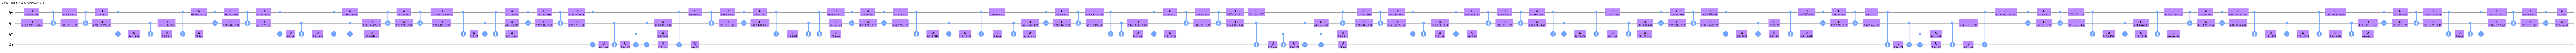

In [ ]:
# Let's build M2 using the permutation matrix definition  Define b for this example
M2_other = mod_mult_gate(a, N)

# Add it to a circuit
circ = QuantumCircuit(num_target) # Use num_target for circuit size
circ.compose(M2_other, inplace=True)
circ = circ.decompose()

# Transpile the circuit and get the depth
pm = generate_preset_pass_manager(optimization_level=2)
transpiled_circ = pm.run(circ)

print(f"qubits: {circ.num_qubits}")
print(
    f"2q-depth: {transpiled_circ.depth(lambda x: x.operation.num_qubits==2)}"
)
print(f"2q-size: {transpiled_circ.size(lambda x: x.operation.num_qubits==2)}")
print(f"Operator counts: {transpiled_circ.count_ops()}")
transpiled_circ.decompose().draw(
    output="mpl", fold=-1, style="clifford", idle_wires=False
)

Now, we are ready to construct the full order finding circuit using our previously defined controlled modular exponentiation operators. In the following code, we also import the [QFT circuit](/docs/api/qiskit/qiskit.circuit.library.QFT) from the Qiskit Circuit library, which uses Hadamard gates on each qubit, a series of controlled-U1 (or Z, depending on the phase) gates, and a layer of swap gates.



/tmp/ipython-input-912997488.py:53: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  circuit.compose(QFT(num_control, inverse=True), qubits=control, inplace=True)


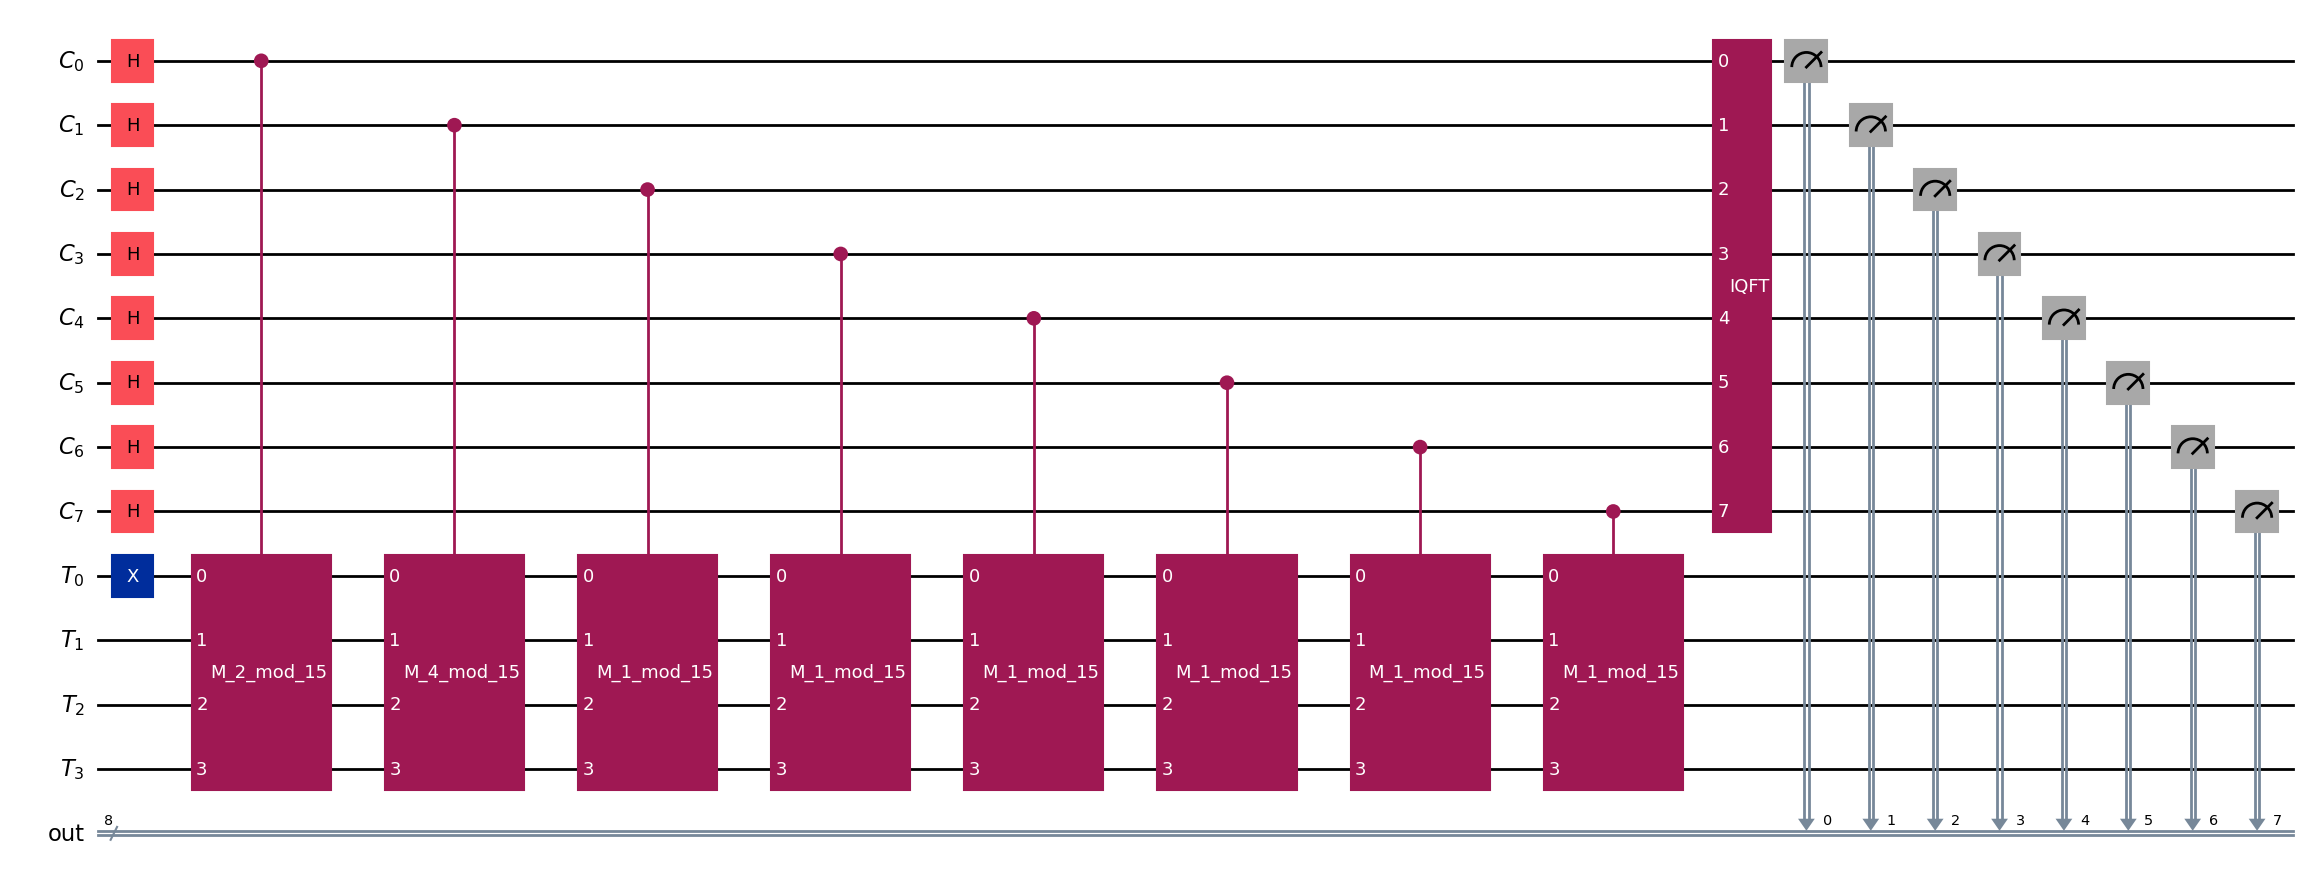

In [ ]:
# Order finding problem for dynamic N and a

# Number of qubits
num_target = floor(log(N - 1, 2)) + 1  # for modular exponentiation operators
num_control = 2 * num_target  # for enough precision of estimation

# List of M_b operators in order
k_list = range(num_control)
b_list = [a2kmodN(a, k, N) for k in k_list]

# Initialize the circuit
control = QuantumRegister(num_control, name="C")
target = QuantumRegister(num_target, name="T")
output = ClassicalRegister(num_control, name="out")
circuit = QuantumCircuit(control, target, output)

# Initialize the target register to the state |1>
circuit.x(num_control)

# Add the Hadamard gates and controlled versions of the
# multiplication gates
for k, qubit in enumerate(control):
    circuit.h(k)
    b = b_list[k]
    # Use the general mod_mult_gate function
    def mod_mult_gate(b, N):
        if gcd(b, N) > 1:
            # For the purpose of constructing the circuit, we can return identity
            # or handle the error more gracefully if needed, but for the algorithm
            # a coprime 'a' should be chosen.
            print(f"Warning: gcd({b},{N}) > 1. Returning Identity gate.")
            n = floor(log(N - 1, 2)) + 1
            return UnitaryGate(np.identity(2**n), name=f"M_{b}_mod_{N}_identity")

        n = floor(log(N - 1, 2)) + 1
        U = np.full((2**n, 2**n), 0)
        for x in range(N):
            U[b * x % N][x] = 1
        for x in range(N, 2**n):
             U[x][x] = 1 # Identity for values >= N
        G = UnitaryGate(U)
        G.name = f"M_{b}_mod_{N}"
        return G

    M_b = mod_mult_gate(b, N)
    if M_b is not None:
         circuit.compose(
            M_b.control(), qubits=[qubit] + list(target), inplace=True
        )


# Apply the inverse QFT to the control register
circuit.compose(QFT(num_control, inverse=True), qubits=control, inplace=True)

# Measure the control register
circuit.measure(control, output)

circuit.draw("mpl", fold=-1)

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService

# Save your account.
# IMPORTANT: Replace "YOUR_API_TOKEN" with your actual API token.
# You can find your API token in your IBM Quantum Experience account settings:
# https://quantum.ibm.com/account
try:
    QiskitRuntimeService.save_account(token="qhvAg-W4nQ4AmAf4GzA84bbZXfBQCge0SA8YzpYngAjD", overwrite=True)
    print("IBM Quantum account saved successfully!")
except Exception as e:
    print(f"Error saving account: {e}")

IBM Quantum account saved successfully!


In [ ]:
service = QiskitRuntimeService()
backend = service.backend("ibm_brisbane")
pm = generate_preset_pass_manager(optimization_level=1, backend=backend)

transpiled_circuit = pm.run(circuit)

print(
    f"2q-depth: {transpiled_circuit.depth(lambda x: x.operation.num_qubits==2)}"
)
print(
    f"2q-size: {transpiled_circuit.size(lambda x: x.operation.num_qubits==2)}"
)
print(f"Operator counts: {transpiled_circuit.count_ops()}")
transpiled_circuit.draw(
    output="mpl", fold=-1, style="clifford", idle_wires=False
)

management.get:WARNING:2025-10-11 18:34:41,610: Loading default saved account
qiskit_runtime_service.__init__:WARNING:2025-10-11 18:34:44,420: Instance was not set at service instantiation. Free and trial plan instances will be prioritized. Based on the following filters: (tags: None, region: us-east, eu-de), and available plans: (open), the available account instances are: try. If you need a specific instance set it explicitly either by using a saved account with a saved default instance or passing it in directly to QiskitRuntimeService().
qiskit_runtime_service.backends:WARNING:2025-10-11 18:34:44,422: Using instance: try, plan: open


2q-depth: 959
2q-size: 1184
Operator counts: OrderedDict({'rz': 3729, 'sx': 2649, 'ecr': 1184, 'x': 203, 'measure': 8})


#Execute using Qiskit primitives



First, we discuss what we would theoretically obtain if we ran this circuit on an ideal simulator. Below, we have a set of simulation results of the above circuit using 1024 shots. As we can see, we get an approximately uniform distribution over four bitstrings over the control qubits.



In [ ]:
# Obtained from the simulator
counts = {"00000000": 264, "01000000": 268, "10000000": 249, "11000000": 243}

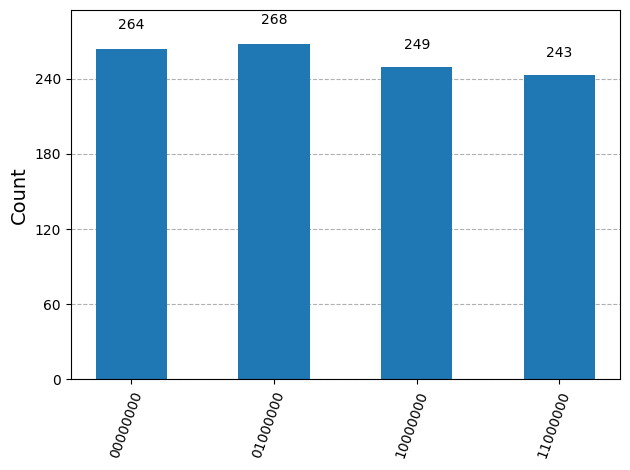

In [ ]:
plot_histogram(counts)

By measuring the control qubits, we obtain an eight-bit phase estimation of the $M_a$ operator. We can convert this binary representation to decimal to find the measured phase. As we can see from the above histogram, four different bitstrings were measured, and each of them corresponds to a phase value as follows.



In [ ]:
# Rows to be displayed in table
rows = []
# Corresponding phase of each bitstring
measured_phases = []

for output in counts:
    decimal = int(output, 2)  # Convert bitstring to decimal
    phase = decimal / (2**num_control)  # Find corresponding eigenvalue
    measured_phases.append(phase)
    # Add these values to the rows in our table:
    rows.append(
        [
            f"{output}(bin) = {decimal:>3}(dec)",
            f"{decimal}/{2 ** num_control} = {phase:.2f}",
        ]
    )

# Print the rows in a table
headers = ["Register Output", "Phase"]
df = pd.DataFrame(rows, columns=headers)
print(df)

            Register Output           Phase
0  00000000(bin) =   0(dec)    0/256 = 0.00
1  01000000(bin) =  64(dec)   64/256 = 0.25
2  10000000(bin) = 128(dec)  128/256 = 0.50
3  11000000(bin) = 192(dec)  192/256 = 0.75


Recall that the any measured phase corresponds to $\theta = k / r$ where $k$ is sampled uniformly at random from $\{0, 1, \dots, r-1 \}$. Therefore, we can use the continued fractions algorithm to attempt to find $k$ and the order $r$. Python has this functionality built in. We can use the `fractions` module to turn a float into a `Fraction` object, for example:



In [ ]:
Fraction(0.666)

Fraction(5998794703657501, 9007199254740992)

Because this gives fractions that return the result exactly (in this case, `0.6660000...`), this can give gnarly results like the one above. We can use the `.limit_denominator()` method to get the fraction that most closely resembles our float, with a denominator below a certain value:



In [ ]:
# Get fraction that most closely resembles 0.666
# with denominator < N
Fraction(0.666).limit_denominator(N)

Fraction(2, 3)

In [ ]:
# Rows to be displayed in a table
rows = []

for phase in measured_phases:
    frac = Fraction(phase).limit_denominator(15)
    rows.append(
        [phase, f"{frac.numerator}/{frac.denominator}", frac.denominator]
    )

# Print the rows in a table
headers = ["Phase", "Fraction", "Guess for r"]
df = pd.DataFrame(rows, columns=headers)
print(df)

   Phase Fraction  Guess for r
0   0.00      0/1            1
1   0.25      1/4            4
2   0.50      1/2            2
3   0.75      3/4            4


In [ ]:
# Sampler primitive to obtain the probability distribution
sampler = Sampler(backend)

# Turn on dynamical decoupling with sequence XpXm
sampler.options.dynamical_decoupling.enable = True
sampler.options.dynamical_decoupling.sequence_type = "XpXm"
# Enable gate twirling
sampler.options.twirling.enable_gates = True

pub = transpiled_circuit
job = sampler.run([pub], shots=1024)

In [ ]:
result = job.result()[0]
counts = result.data["out"].get_counts()

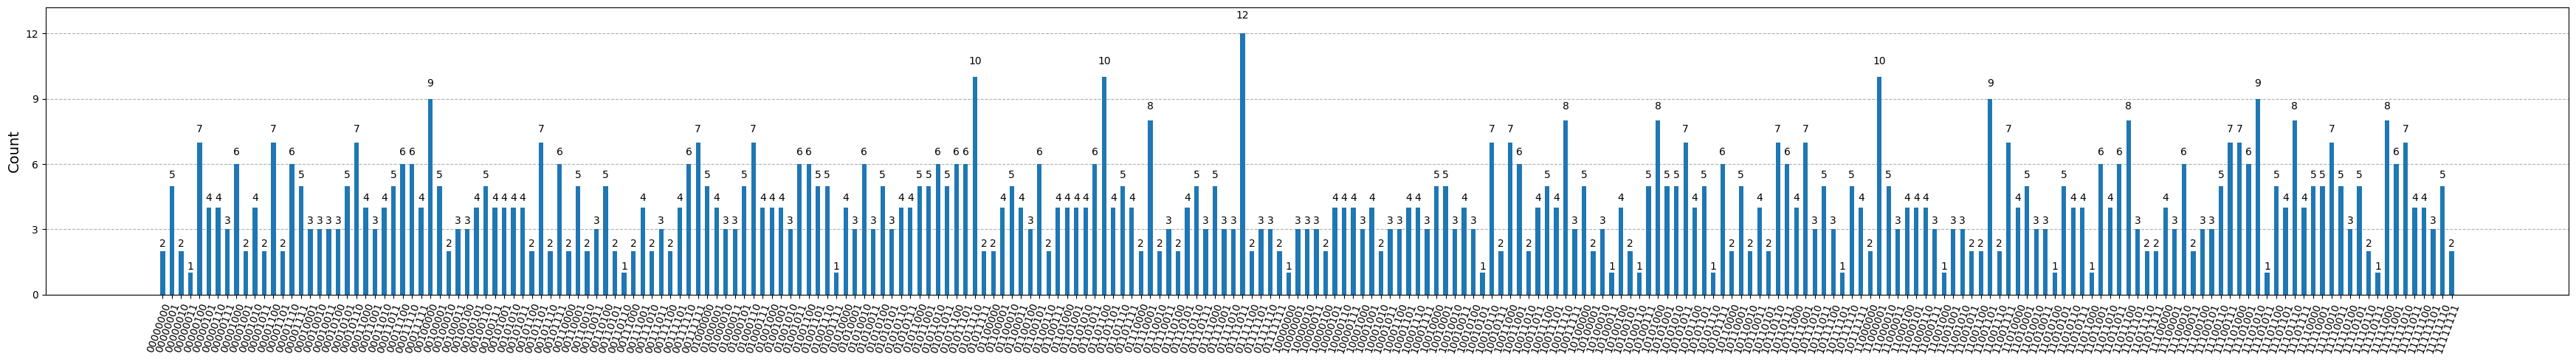

In [ ]:
plot_histogram(counts, figsize=(35, 5))

As we can see, we obtained the same bitstrings with highest counts. Since quantum hardware has noise, there is some leakage to other bitstrings, which we can filter out statistically.



In [ ]:
# Dictionary of bitstrings and their counts to keep
counts_keep = {}
# Threshold to filter
threshold = np.max(list(counts.values())) / 2

for key, value in counts.items():
    if value > threshold:
        counts_keep[key] = value

print(counts_keep)

{'00010110': 7, '10101011': 7, '11011100': 8, '11101110': 8, '10110110': 7, '00001100': 7, '11111010': 7, '10011110': 8, '10010110': 7, '10011000': 7, '01011110': 10, '11001111': 7, '11101010': 9, '11101000': 7, '00101101': 7, '00111111': 7, '01110001': 8, '00000100': 7, '01111011': 12, '00100000': 9, '10111001': 7, '11100111': 7, '11111000': 8, '01000110': 7, '11110010': 7, '10101000': 8, '11000001': 10, '01101100': 10, '11001101': 9}


#Post-process and return result in desired classical format



### Integer Factorization



We now demonstrate this using our example of $N and $ a . Recall that the phase we measured is $k / r$, where $a^r \; (\textrm{mod} \; N) = 1$ and $k$ is a random integer between $0$ and $r - 1$. From this equation, we have $(a^r - 1) \; (\textrm{mod} \; N) = 0,$ which means $N$ must divide $a^r-1$. If $r$ is also even, then we can write $a^r -1 = (a^{r/2}-1)(a^{r/2}+1).$ If $r$ is not even, we cannot go further and must try again with a different value for $a$; otherwise, there is a high probability that the greatest common divisor of $N$ and either $a^{r/2}-1$, or $a^{r/2}+1$ is a proper factor of $N$.

Since some runs of the algorithm will statistically fail, we will repeat this algorithm until at least one factor of $N$ is found.



The cell below repeats the algorithm until at least one factor of N is found. We will use the results of the hardware run above to guess the phase and the corresponding factor in each iteration.



In [ ]:
FACTOR_FOUND = False
num_attempt = 0

while not FACTOR_FOUND:
    print(f"\nATTEMPT {num_attempt}:")
    '''Here, we get the bitstring by iterating over outcomes
       of a previous hardware run with multiple shots.
       Instead, we can also perform a single-shot measurement
       here in the loop.
       Ensure we don't go out of bounds if counts_keep has fewer entries than num_attempt'''
    if num_attempt >= len(counts_keep):
        print("Ran out of measurement outcomes to process.")
        break

    bitstring = list(counts_keep.keys())[num_attempt]
    num_attempt += 1
    # Find the phase from measurement
    decimal = int(bitstring, 2)
    phase = decimal / (2**num_control)  # phase = k / r
    print(f"Phase: theta = {phase}")

    # Guess the order from phase
    # Limit denominator by N
    frac = Fraction(phase).limit_denominator(N)
    r = frac.denominator  # order = r
    print(f"Order of {a} modulo {N} estimated as: r = {r}")

    # Check if the order is valid and leads to a factor
    if phase != 0 and r > 0: # Ensure r is positive and phase is not 0
        # Guesses for factors are gcd(a^{r / 2} ± 1, N)
        if r % 2 == 0:
            x = pow(a, r // 2, N)
            # Avoid trivial factors gcd(a^{r/2} - 1, N) = 1 or N
            if gcd(x - 1, N) != 1 and gcd(x - 1, N) != N:
                d1 = gcd(x - 1, N)
                d2 = N // d1
                FACTOR_FOUND = True
                print(f"*** Non-trivial factors found: {d1} and {d2} ***")
            # Avoid trivial factors gcd(a^{r/2} + 1, N) = 1 or N
            elif gcd(x + 1, N) != 1 and gcd(x + 1, N) != N:
                 d1 = gcd(x + 1, N)
                 d2 = N // d1
                 FACTOR_FOUND = True
                 print(f"*** Non-trivial factors found: {d1} and {d2} ***")
            else:
                print("Trivial factor found, trying next outcome...")
        else:
             print("Order is odd, trying next outcome...")
    else:
        print("Phase is 0 or order is not positive, trying next outcome...")

if not FACTOR_FOUND:
    print("\nCould not find a non-trivial factor from the measured outcomes.")


ATTEMPT 0:
Phase: theta = 0.0859375
Order of 2 modulo 15 estimated as: r = 12
*** Non-trivial factors found: 3 and 5 ***


In [ ]:
import math
import random

# --- 1. Extended Euclidean Algorithm (Used to find the private key 'd') ---
# This function finds 'd' such that (d * e) % phi == 1
def extended_gcd(a, b):
    if a == 0:
        return (b, 0, 1)
    else:
        g, y, x = extended_gcd(b % a, a)
        return (g, x - (b // a) * y, y)

def modular_inverse(e, phi):
    g, x, y = extended_gcd(e, phi)
    if g != 1:
        # Inverse doesn't exist
        raise Exception('Modular inverse does not exist')
    else:
        # x % phi is the modular inverse 'd'
        return x % phi

# --- 2. Decryption Function ---
def decrypt_rsa(p, q, e, ciphertext):
    # Step 1: Calculate N and Euler's Totient function (phi)
    N = p * q
    phi_N = (p - 1) * (q - 1)

    # Step 2: Calculate the Private Exponent (d)
    # 'd' is the modular inverse of 'e' modulo 'phi_N'
    try:
        d = modular_inverse(e, phi_N)
    except Exception as e:
        return f"Error: {e}"


    print(f"Calculated Phi(N): {phi_N}")
    print(f"Calculated Private Key (d): {d}")

    # Step 3: Decrypt the message
    # M = C^d mod N
    # pow(base, exp, mod) is used for efficient modular exponentiation
    decrypted_int = pow(ciphertext, d, N)

    return decrypted_int


def generate_valid_e(phi_N):
    """
    Randomly generates a valid public exponent 'e' such that:
    1.  1 < e < phi_n
    2.  gcd(e, phi_n) == 1 (e is coprime to phi_n)
    """

    # The search space for e is strictly between 1 and phi_n.
    # The lower bound for randint is 2 (since e > 1).
    # The upper bound for randint is phi_n - 1 (since e < phi_n).
    min_e = 2
    max_e = phi_N - 1

    if max_e < min_e:
        # This occurs if phi_n is 2 or less (e.g., p=3, q=2, N=6, phi_N=2)
        # This shouldn't happen with large primes, but is good for robustness.
        print("Error: phi(N) is too small to find a valid 'e'.")
        return None

    print(f"Searching for a random 'e' in the range [{min_e}, {max_e}] that is coprime to {phi_N}...")

    while True:
        # 1. Generate a random integer 'e' within the required range.
        e = random.randint(min_e, max_e)

        # 2. Check for coprimality.
        if gcd(e, phi_N) == 1:
            print(f"✅ Found a valid random 'e': {e}")
            return e

# --- Example Usage with Small Primes (Not Secure) ---
# NOTE: These small numbers are for demonstration only.
# Real RSA uses primes thousands of digits long.


cipher = int(input("Enter the encrypted message "))
phi_N = (d1-1)*(d2-1)

e = generate_valid_e(phi_N)

# Perform decryption
decrypted_message_int = decrypt_rsa(d1, d2, e , cipher)

print("-" * 30)
print(f"Input Ciphertext (C): {cipher}")
print(f"Decrypted Integer Message (M): {decrypted_message_int}")

Enter the encrypted message 3
Searching for a random 'e' in the range [2, 7] that is coprime to 8...
✅ Found a valid random 'e': 3
Calculated Phi(N): 8
Calculated Private Key (d): 3
------------------------------
Input Ciphertext (C): 3
Decrypted Integer Message (M): 12
